<a href="https://colab.research.google.com/github/gamana29/MODIS-Satellite-data-AICTE-Internship/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [3]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0.0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0.0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0.0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0.0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0.0


In [4]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511.0,Terra,MODIS,7.0,6.03,288.4,7.1,D,0.0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512.0,Terra,MODIS,62.0,6.03,293.5,10.4,D,2.0
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512.0,Terra,MODIS,42.0,6.03,293.3,5.8,D,2.0
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512.0,Terra,MODIS,38.0,6.03,295.2,9.3,D,2.0
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512.0,Terra,MODIS,52.0,6.03,293.1,7.2,D,2.0


In [5]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0.0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0.0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0.0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0.0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0.0


In [6]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409.0,Terra,MODIS,44.0,6.03,292.6,8.6,D,0.0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547.0,Terra,MODIS,37.0,6.03,287.4,9.0,D,0.0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547.0,Terra,MODIS,8.0,6.03,286.5,5.4,D,0.0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547.0,Terra,MODIS,46.0,6.03,287.7,10.7,D,0.0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547.0,Terra,MODIS,43.0,6.03,287.6,9.0,D,0.0


In [7]:
df.shape

(214806, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214806 entries, 0 to 214805
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    214806 non-null  float64
 1   longitude   214805 non-null  float64
 2   brightness  214805 non-null  float64
 3   scan        214805 non-null  float64
 4   track       214805 non-null  float64
 5   acq_date    214805 non-null  object 
 6   acq_time    214805 non-null  float64
 7   satellite   214805 non-null  object 
 8   instrument  214805 non-null  object 
 9   confidence  214805 non-null  float64
 10  version     214805 non-null  float64
 11  bright_t31  214805 non-null  float64
 12  frp         214804 non-null  float64
 13  daynight    214803 non-null  object 
 14  type        214803 non-null  float64
dtypes: float64(11), object(4)
memory usage: 24.6+ MB


In [9]:
df.isnull().sum()

,0
latitude,0
longitude,1
brightness,1
scan,1
track,1
acq_date,1
acq_time,1
satellite,1
instrument,1
confidence,1


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,214806.0,23.221626,4.720649,8.1592,20.332475,23.37665,25.932675,34.9734
longitude,214805.0,82.097300,6.730437,68.4526,76.600800,80.13070,86.206400,97.1044
brightness,214805.0,324.517658,14.700821,300.0000,315.200000,323.20000,331.300000,505.7000
scan,214805.0,1.432397,0.641577,1.0000,1.000000,1.20000,1.600000,4.8000
track,214805.0,1.156069,0.204812,1.0000,1.000000,1.10000,1.200000,2.0000
acq_time,214805.0,826.704951,366.503900,321.0000,643.000000,750.00000,824.000000,2202.0000
confidence,214805.0,64.506790,18.351068,0.0000,54.000000,66.00000,76.000000,100.0000
version,214805.0,23.061424,25.429548,6.0300,6.030000,6.03000,61.030000,61.0300
bright_t31,214805.0,303.976017,8.515492,267.2000,298.200000,303.30000,310.200000,400.1000
frp,214804.0,30.095968,89.349437,0.0000,8.900000,13.90000,25.800000,6961.8000


In [13]:
df.type.value_counts()

,count
type,
0.0,204950
2.0,9822
3.0,31


In [14]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '202

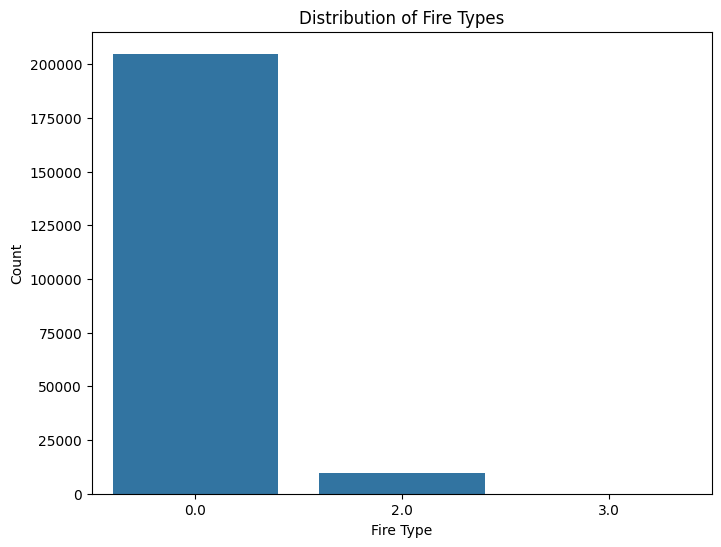

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

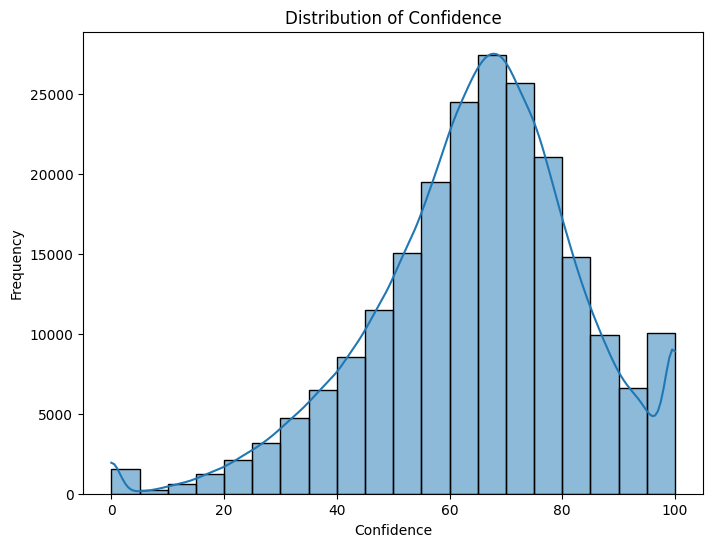

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()